# Data preprocessing

This notebook is focused on analyzing and preprocessing a dataset related to student depression. The goal is to explore the data, clean it as necessary, and prepare it for machine learning models to predict the depression level of a student based on some key features.

## Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
import pickle

Create the dataset variable:

In [23]:
df = pd.read_csv('Student Depression Dataset.csv')
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


Some columns are not necessary for our analysis (id, Profession, Work Pressure, Job Satisfaction). So we remove them from the `df` variable: 

In [24]:
df.drop(['id'], axis=1, inplace=True)
df.drop(['Profession'], axis=1, inplace=True)
df.drop(['Work Pressure'], axis=1, inplace=True)
df.drop(['Job Satisfaction'], axis=1, inplace=True)
df.drop(['City'], axis=1, inplace=True)

In [25]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In our dataset we have some columns with categorical data, but for machine learning process we will use algotithms that require numeric data: 

In [27]:
def convert_column_to_numeric(df, col):
    value_to_number = {}
    if 'Yes' in df[col].values and 'No' in df[col].values:
        value_to_number['Yes'] = 1
        value_to_number['No'] = 0

    if 'Healthy' in df[col].values:
        value_to_number['Healthy'] = 2
    if 'Moderate' in df[col].values:
        value_to_number['Moderate'] = 1
    if 'Unhealthy' in df[col].values:
        value_to_number['Unhealthy'] = 0

    unique_values = df[col].unique()
    for value in enumerate(unique_values):
        if value not in value_to_number:
            value_to_number[value] = len(value_to_number)

    df[col] = df[col].map(value_to_number)

    return df, value_to_number

In [28]:
# convert categorical data
convert_column_to_numeric(df, 'Gender') # Male 0, Female 1
convert_column_to_numeric(df, 'Dietary Habits')
convert_column_to_numeric(df, 'Have you ever had suicidal thoughts ?')
convert_column_to_numeric(df, 'Family History of Mental Illness')

df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,NaN,33.0,5.0,8.97,2.0,5-6 hours,2.0,B.Pharm,1,3.0,1.0,0,1
1,NaN,24.0,2.0,5.90,5.0,5-6 hours,1.0,BSc,0,3.0,2.0,1,0
2,NaN,31.0,3.0,7.03,5.0,Less than 5 hours,2.0,BA,0,9.0,1.0,1,0
3,NaN,28.0,3.0,5.59,2.0,7-8 hours,1.0,BCA,1,4.0,5.0,1,1
4,NaN,25.0,4.0,8.13,3.0,5-6 hours,1.0,M.Tech,1,1.0,1.0,0,0


For Sleep Duration column we apply a different conversion:

In [29]:
convert = {
    '5-6 hours': 5.5,
    'Less than 5 hours': 4.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 8.5,
    'Others': 0
}

df['Sleep Duration'] = df['Sleep Duration'].map(convert)
df['Sleep Duration'] = df['Sleep Duration'].astype(float)
df['Sleep Duration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 27901 entries, 0 to 27900
Series name: Sleep Duration
Non-Null Count  Dtype  
--------------  -----  
27901 non-null  float64
dtypes: float64(1)
memory usage: 218.1 KB


Also for the degree we apply a different conversion according to the grade:
* 0 for Diploma
* 1 for Bachelor degree
* 2 for Master degree
* 3 for PhD

In [30]:
mapping = {'C': 0, 'B': 1, 'L': 1, 'M': 2, 'P': 3}

def transform_feature(feature):
    first_letter = feature[0]
    return mapping.get(first_letter, -1)

df['Degree'] = df['Degree'].apply(transform_feature)

In [31]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,NaN,33.0,5.0,8.97,2.0,5.5,2.0,1,1,3.0,1.0,0,1
1,NaN,24.0,2.0,5.90,5.0,5.5,1.0,1,0,3.0,2.0,1,0
2,NaN,31.0,3.0,7.03,5.0,4.5,2.0,1,0,9.0,1.0,1,0
3,NaN,28.0,3.0,5.59,2.0,7.5,1.0,1,1,4.0,5.0,1,1
4,NaN,25.0,4.0,8.13,3.0,5.5,1.0,2,1,1.0,1.0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  int64  
 1   Age                                    27901 non-null  float64
 2   Academic Pressure                      27901 non-null  float64
 3   CGPA                                   27901 non-null  float64
 4   Study Satisfaction                     27901 non-null  float64
 5   Sleep Duration                         27901 non-null  float64
 6   Dietary Habits                         27901 non-null  int64  
 7   Degree                                 27901 non-null  int64  
 8   Have you ever had suicidal thoughts ?  27901 non-null  int64  
 9   Work/Study Hours                       27901 non-null  float64
 10  Financial Stress                       27898 non-null  float64
 11  Fa

We check if we have any empty cell in our data and get rid of them:

In [11]:
df.isna().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [12]:
df = df.dropna()
df.isna().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

We convert some features from float to int:

In [13]:
df['Age'] = df['Age'].astype(int)
df['Academic Pressure'] = df['Academic Pressure'].astype(int)
df['Study Satisfaction'] = df['Study Satisfaction'].astype(int)
df['Work/Study Hours'] = df['Work/Study Hours'].astype(int)
df['Financial Stress'] = df['Financial Stress'].astype(int)

In [14]:
unique = df.nunique()
print(unique)

Gender                                     2
Age                                       34
Academic Pressure                          6
CGPA                                     332
Study Satisfaction                         6
Sleep Duration                             5
Dietary Habits                             4
Degree                                     5
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64


We save the dataset into a new csv file:

In [15]:
df.to_csv('cleaned_dataset.csv', index=False)

# Machine Learing

We will create some machine learning models that will classify if students have depression or not. Our classifiers will be:
* Decision Tree
* Random Forest
* KNN

In [16]:
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33,5,8.97,2,5.5,2,1,1,3,1,0,1
1,1,24,2,5.90,5,5.5,1,1,0,3,2,1,0
2,0,31,3,7.03,5,4.5,2,1,0,9,1,1,0
3,1,28,3,5.59,2,7.5,1,1,1,4,5,1,1
4,1,25,4,8.13,3,5.5,1,2,1,1,1,0,0


In [17]:
# split the data
X = df.drop('Depression', axis=1)
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

Train Decision Tree Classifier

In [ ]:
params = {'criterion': ['gini', 'log_loss', 'entropy'],
          'max_depth': [None, 5, 10, 15, 20],
          'min_samples_split': [2, 4, 5, 7, 9],
          'min_samples_leaf': [1, 2, 4, 5, 6]}

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5).fit(X_train, y_train)

dtc = DecisionTreeClassifier(**grid.best_params_).fit(X_train, y_train)
y_hat = dtc.predict(X_test)

dtc_accuracy = accuracy_score(y_test, y_hat)
dtc_recall = recall_score(y_test, y_hat, average='weighted')
dtc_f1 = f1_score(y_test, y_hat, average='weighted')

print(f'''Accuracy Score: {dtc_accuracy}
Recall Score: {dtc_recall}
F1 Score: {dtc_f1}''')

Accuracy Score: 0.8297491039426523
Recall Score: 0.8297491039426523
F1 Score: 0.8294485875189577


Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(**grid.best_params_).fit(X_train, y_train)
y_hat = rfc.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_hat)
rfc_recall = recall_score(y_test, y_hat, average='weighted')
rfc_f1 = f1_score(y_test, y_hat, average='weighted')

print(f'''Accuracy Score: {rfc_accuracy}
Recall Score: {rfc_recall}
F1 Score: {rfc_f1}''')
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)

Accuracy Score: 0.8453405017921147
Recall Score: 0.8453405017921147
F1 Score: 0.8445978524983238


K-Nearest Neighbors Classifier

In [ ]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5).fit(X_train, y_train)

knn = KNeighborsClassifier(**knn_grid.best_params_).fit(X_train, y_train)
y_hat_knn = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_hat_knn)
knn_recall = recall_score(y_test, y_hat_knn, average='weighted')
knn_f1 = f1_score(y_test, y_hat_knn, average='weighted')

print(f'''Accuracy Score: {knn_accuracy}
Recall Score: {knn_recall}
F1 Score: {knn_f1}''')

Accuracy Score: 0.8247311827956989
Recall Score: 0.8247311827956989
F1 Score: 0.8230916311088353


For selecting the best model we will create a graph and see performance evaluation:

In [21]:
scores = {'Decision Tree': [dtc_accuracy, dtc_recall, dtc_f1],
          'Random Forest': [rfc_accuracy, rfc_recall, rfc_f1],
          'K-Nearest Neighbors': [knn_accuracy, knn_recall, knn_f1]}

scores_table = pd.DataFrame(scores)
scores_table.index = ['Accuracy', 'Recall', 'F1']
scores_table.head()

,Decision Tree,Random Forest,K-Nearest Neighbors
Accuracy,0.829749,0.845341,0.824731
Recall,0.829749,0.845341,0.824731
F1,0.829449,0.844598,0.823092


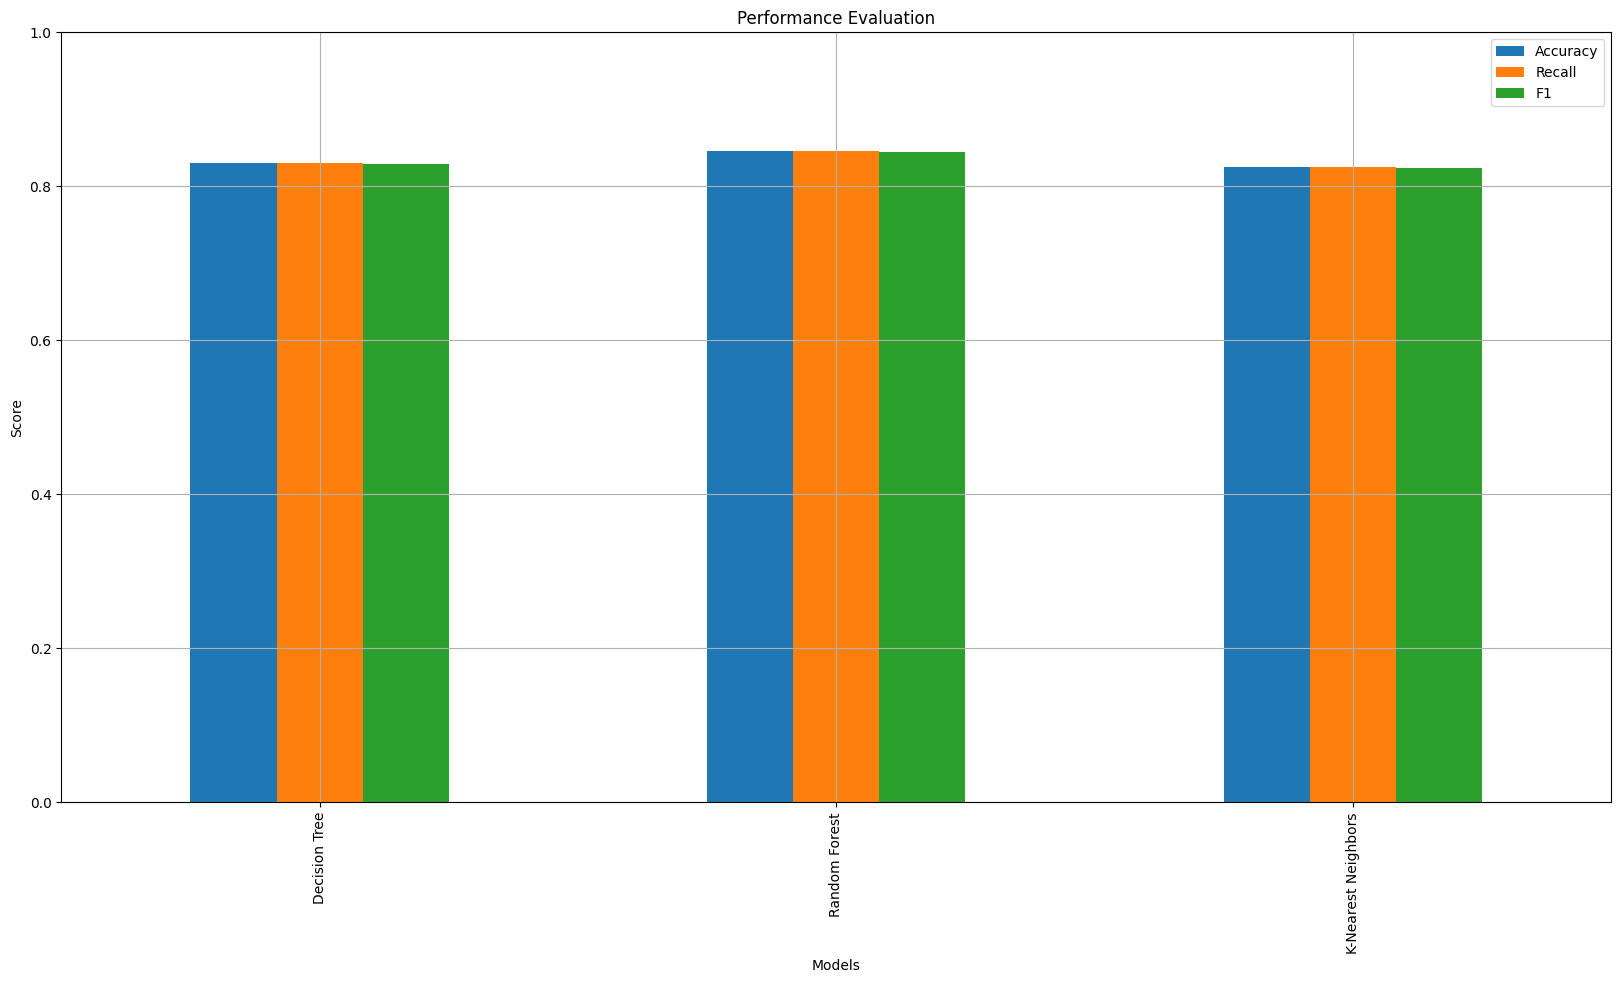

In [ ]:
scores_table.T.plot(kind='bar', figsize=(20, 10))
plt.title('Performance Evaluation')
plt.xlabel('Models')
plt.ylabel('Score')
plt.ylim([0,1])
plt.grid()
plt.show()

From results, we can see that we generally have scores above 80% so our models are all successful. The best performance index however is Random Forest so we will select it for our project.